In [9]:
import pandas as pd
import statsmodels.api as sm

In [10]:
df = pd.read_csv('/Users/beok/Project/LLM_effection/regression/Salary_dataset.csv', index_col=False)

df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [11]:
# 2. 독립 변수(X)와 종속 변수(y) 설정
# 'YearsExperience'를 사용하여 'Salary'를 예측합니다.
X = df['YearsExperience']
y = df['Salary']

# 3. 상수항(Intercept) 추가
# statsmodels는 기본적으로 상수항을 포함하지 않으므로 sm.add_constant를 통해 추가해줘야 합니다.
X = sm.add_constant(X)

# 4. OLS(Ordinary Least Squares) 모델 생성 및 학습
model = sm.OLS(y, X)
results = model.fit()

# 5. 회귀 분석 결과 요약 출력
print(results.summary())

# 6. (선택 사항) 특정 결과값만 확인하고 싶을 때
print(f"\n[주요 결과 지표]")
print(f"결정계수 (R-squared): {results.rsquared:.4f}")
print(f"회귀계수 (Coefficients):\n{results.params}")
print(f"P-value:\n{results.pvalues}")

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           1.14e-20
Time:                        22:20:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     

In [12]:
# 분석을 위한 잔차 및 예측값 추출
residuals = results.resid
fitted_values = results.fittedvalues

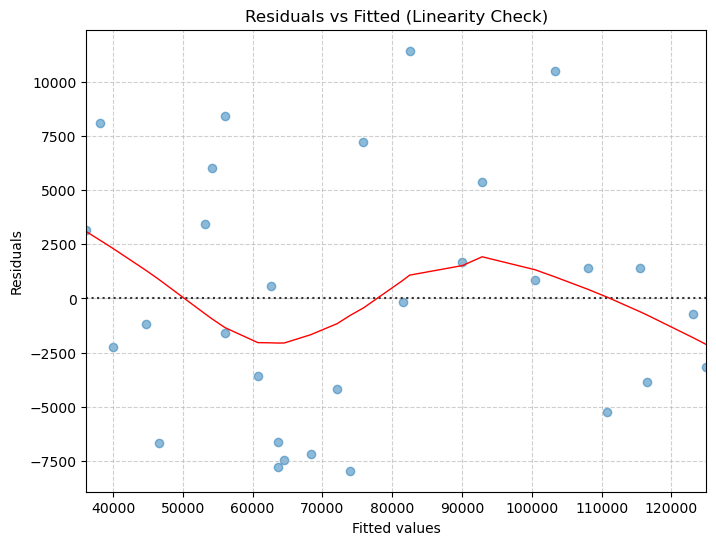

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# ---------------------------------------------------------
# (1) 선형성 확인: Residuals vs Fitted
# ---------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, 
              scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted (Linearity Check)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show() # 또는 plt.savefig('linearity.png')

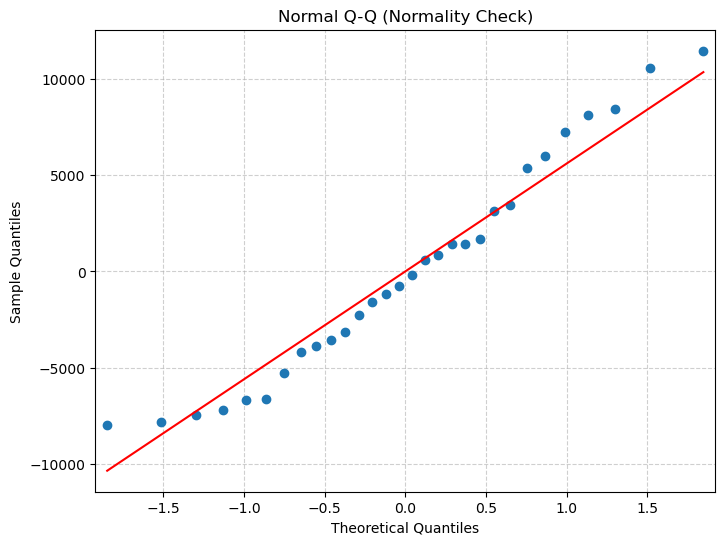

In [16]:
# ---------------------------------------------------------
# (2) 정규성 확인: Normal Q-Q Plot
# ---------------------------------------------------------
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Normal Q-Q (Normality Check)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show() # 또는 plt.savefig('normality.png')

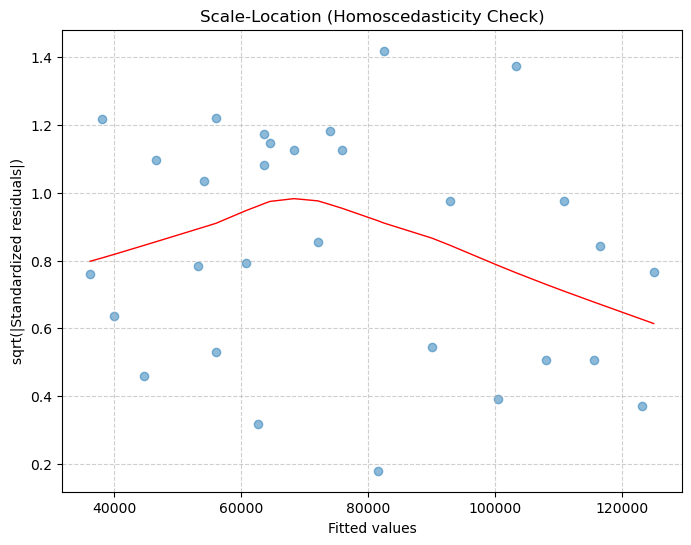

In [17]:
# ---------------------------------------------------------
# (3) 등분산성 확인: Scale-Location Plot
# ---------------------------------------------------------
plt.figure(figsize=(8, 6))
# 표준화 잔차의 절대값에 루트를 씌운 값 계산
standardized_residuals = np.sqrt(np.abs(results.get_influence().resid_studentized_internal))

plt.scatter(fitted_values, standardized_residuals, alpha=0.5)
sns.regplot(x=fitted_values, y=standardized_residuals, scatter=False, ci=None, lowess=True, 
            line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location (Homoscedasticity Check)')
plt.xlabel('Fitted values')
plt.ylabel('sqrt(|Standardized residuals|)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show() # 또는 plt.savefig('homoscedasticity.png')